In [1]:
import xarray as xr
import matplotlib.pyplot as plt

#ds_m=xr.open_dataset('../data/GEOS.fp.fcst.inst3_3d_asm_Np.20201104_18+20201104_1800.V01.nc4')
#ds_s=xr.open_dataset('../data/G16V04.0.ACTIV.2020309.1801.PX.02K.NC')
#ds_s0=xr.open_dataset('../data/G16V04.0.ACTIV.2020309.1731.PX.02K.NC')

ds_m=xr.open_dataset('../data/GEOS.fp.fcst.inst3_3d_asm_Np.20201130_18+20201130_1800.V01.nc4')
ds_s=xr.open_dataset('../data/G16V04.0.ACTIV.2020335.1801.PX.02K.NC')
ds_s0=xr.open_dataset('../data/G16V04.0.ACTIV.2020335.1731.PX.02K.NC')
ds_s['cloud_top_height_0']=ds_s0['cloud_top_height'].copy()
#ds_s0['image_y']=abs(ds_s0['image_y']-800)

print(ds_m)

/Users/aouyed/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/aouyed/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


<xarray.Dataset>
Dimensions:  (lat: 721, lev: 42, lon: 1152, time: 1)
Coordinates:
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * time     (time) datetime64[ns] 2020-11-30T18:00:00
Data variables:
    EPV      (time, lev, lat, lon) float32 ...
    H        (time, lev, lat, lon) float32 ...
    O3       (time, lev, lat, lon) float32 ...
    OMEGA    (time, lev, lat, lon) float32 ...
    PHIS     (time, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    QI       (time, lev, lat, lon) float32 ...
    QL       (time, lev, lat, lon) float32 ...
    QR       (time, lev, lat, lon) float32 ...
    QS       (time, lev, lat, lon) float32 ...
    QV       (time, lev, lat, lon) float32 ...
    RH       (time, lev, lat, lon) float32 ...
    SLP      (time, lat, lon) float32 ...
    T        

In [2]:
import numpy as np

lat_min=np.asscalar(ds_s['latitude'].min())
lat_max=np.asscalar(ds_s['latitude'].max())
lon_min=np.asscalar(ds_s['longitude'].min())
lon_max=np.asscalar(ds_s['longitude'].max())
z_max=np.asscalar(ds_s['cloud_top_pressure'].max())
z_min=np.asscalar(ds_s['cloud_top_pressure'].min())

/Users/aouyed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aouyed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/Users/aouyed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """
/Users/aouyed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
/Users/aouyed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys
/Users/aouyed/anaconda3/li

In [3]:
#ds_m_unit=ds_m.loc[dict(lat=slice(lat_min, lat_max))].copy()
#ds_m_unit=ds_m_unit.loc[dict(lon=slice(lon_min, lon_max))].copy()
#ds_m_unit=ds_m_unit.loc[dict(lev=slice(z_max, z_min))].copy()
ds_m_unit=ds_m.drop('time')

In [4]:
from scipy.interpolate import RegularGridInterpolator as rgi
import numpy as np
v_function=rgi(points=(1000-ds_m_unit['lev'].values, ds_m_unit['lat'].values, ds_m_unit['lon'].values),values= np.squeeze(ds_m_unit['V'].values),bounds_error=False, fill_value=np.nan)
u_function=rgi(points=(1000-ds_m_unit['lev'].values, ds_m_unit['lat'].values, ds_m_unit['lon'].values),values= np.squeeze(ds_m_unit['U'].values),bounds_error=False, fill_value=np.nan)
t_function=rgi(points=(1000-ds_m_unit['lev'].values, ds_m_unit['lat'].values, ds_m_unit['lon'].values),values= np.squeeze(ds_m_unit['T'].values),bounds_error=False, fill_value=np.nan)

omega_function=rgi(points=(1000-ds_m_unit['lev'].values, ds_m_unit['lat'].values, ds_m_unit['lon'].values),values= np.squeeze(ds_m_unit['OMEGA'].values),bounds_error=False, fill_value=np.nan)

In [5]:
import metpy.calc
from metpy.units import units

print('hello')
df=ds_s[['cloud_top_pressure','cloud_top_height','cloud_top_height_0']].to_dataframe().reset_index()
#df=df.dropna()
#df=df[(df.cloud_top_pressure > 700) & (df.cloud_top_pressure <1000)]
df['cloud_top_pressure']=1000-df['cloud_top_pressure']
df['cloud_top_height']=1000*df['cloud_top_height']
df['cloud_top_height_0']=1000*df['cloud_top_height_0']
print(df['cloud_top_pressure'].max())
df['u']=u_function(df[['cloud_top_pressure','latitude', 'longitude']].values)
df['v']=v_function(df[['cloud_top_pressure','latitude', 'longitude']].values)
df['omega']=omega_function(df[['cloud_top_pressure','latitude', 'longitude']].values)
df['t']=t_function(df[['cloud_top_pressure','latitude', 'longitude']].values)

omega=df['omega'].to_numpy()*units('Pa/s')
pressure=df['cloud_top_pressure'].to_numpy()*units('hPa')
t=df['t'].to_numpy()*units('K')
df['w']=metpy.calc.vertical_velocity(omega, pressure, t )

df['cloud_top_pressure']=-df['cloud_top_pressure']+1000
df=df.set_index(['image_x', 'image_y'])


hello
890.82825


/Users/aouyed/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2539: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
/Users/aouyed/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2540: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


In [6]:
import metpy.calc as mpcalc
import cv2
from metpy.units import units

ds_inter=xr.Dataset.from_dataframe(df)
ds_inter['tendency']=(ds_inter['cloud_top_height']-ds_inter['cloud_top_height_0'])/1800
ds_inter['image_y']=abs(ds_inter['image_y']-800)
dx, dy = mpcalc.lat_lon_grid_deltas(ds_inter['latitude'].values, ds_inter['longitude'].values)
gradz=mpcalc.gradient(ds_inter['cloud_top_height'].values, deltas=(dy, dx))
gradz_y=gradz[0].magnitude
gradz_x=gradz[1].magnitude
ds_inter['gradz_y']=(('image_x','image_y'),gradz_y)
ds_inter['gradz_x']=(('image_x','image_y'),gradz_x)
ds_inter['transport']=ds_inter['u']*ds_inter['gradz_x'] + ds_inter['v']*ds_inter['gradz_y']
ds_inter['entrainment']=ds_inter['transport'] + ds_inter['omega']
mask2=np.isnan(ds_inter['cloud_top_pressure'].values)
mask = np.ma.masked_invalid(ds_inter['cloud_top_pressure'].values)
mask = np.uint8(mask.mask)
frame=np.nan_to_num(ds_inter['cloud_top_pressure'].values)
frame = cv2.inpaint(frame, mask, inpaintRadius=10, flags=cv2.INPAINT_NS)
blurred=cv2.blur(frame, (10,10))
blurred[mask2]=np.nan            
gradz=mpcalc.gradient(blurred, deltas=(dy, dx))
gradz_y=gradz[0].magnitude
gradz_x=gradz[1].magnitude

mask2=np.isnan(ds_inter['w'].values)
mask = np.ma.masked_invalid(ds_inter['w'].values)
mask = np.uint8(mask.mask)
frame=np.nan_to_num(ds_inter['w'].values)
frame=frame.astype(np.float32)
frame = cv2.inpaint(frame, mask, inpaintRadius=10, flags=cv2.INPAINT_NS)
blurred=cv2.blur(frame, (10,10))
blurred[mask2]=np.nan 
wf=blurred

mask2=np.isnan(ds_inter['tendency'].values)
mask = np.ma.masked_invalid(ds_inter['tendency'].values)
mask = np.uint8(mask.mask)
frame=np.nan_to_num(ds_inter['tendency'].values)
frame=frame.astype(np.float32)
frame = cv2.inpaint(frame, mask, inpaintRadius=10, flags=cv2.INPAINT_NS)
blurred=cv2.blur(frame, (10,10))
blurred[mask2]=np.nan 
tendency=blurred

ds_inter['tendencyf']=(('image_x','image_y'),tendency)
ds_inter['wf']=(('image_x','image_y'),wf)
ds_inter['gradz_yf']=(('image_x','image_y'),gradz_y)
ds_inter['gradz_xf']=(('image_x','image_y'),gradz_x)
ds_inter['transportf']=ds_inter['u']*ds_inter['gradz_xf'] + ds_inter['v']*ds_inter['gradz_yf']
ds_inter['entrainmentf']=ds_inter['transportf'] + ds_inter['omega']
ds_inter=ds_inter.transpose("image_y", "image_x")
print(ds_inter)


/Users/aouyed/anaconda3/lib/python3.7/site-packages/metpy/calc/tools.py:850: RuntimeWarning: invalid value encountered in less
  dy[(forward_az < -90.) | (forward_az > 90.)] *= -1
/Users/aouyed/anaconda3/lib/python3.7/site-packages/metpy/calc/tools.py:850: RuntimeWarning: invalid value encountered in greater
  dy[(forward_az < -90.) | (forward_az > 90.)] *= -1
/Users/aouyed/anaconda3/lib/python3.7/site-packages/metpy/calc/tools.py:854: RuntimeWarning: invalid value encountered in less
  dx[(forward_az < 0.) | (forward_az > 180.)] *= -1
/Users/aouyed/anaconda3/lib/python3.7/site-packages/metpy/calc/tools.py:854: RuntimeWarning: invalid value encountered in greater
  dx[(forward_az < 0.) | (forward_az > 180.)] *= -1


<xarray.Dataset>
Dimensions:             (image_x: 1000, image_y: 800)
Coordinates:
  * image_x             (image_x) int64 1 2 3 4 5 6 ... 995 996 997 998 999 1000
  * image_y             (image_y) int64 799 798 797 796 795 794 ... 5 4 3 2 1 0
Data variables:
    cloud_top_pressure  (image_y, image_x) float32 nan nan nan ... nan nan nan
    cloud_top_height    (image_y, image_x) float32 nan nan nan ... nan nan nan
    cloud_top_height_0  (image_y, image_x) float32 nan nan nan ... nan nan nan
    longitude           (image_y, image_x) float32 nan nan nan ... nan nan nan
    latitude            (image_y, image_x) float32 nan nan nan ... nan nan nan
    u                   (image_y, image_x) float64 nan nan nan ... nan nan nan
    v                   (image_y, image_x) float64 nan nan nan ... nan nan nan
    omega               (image_y, image_x) float64 nan nan nan ... nan nan nan
    t                   (image_y, image_x) float64 nan nan nan ... nan nan nan
    w                   (ima

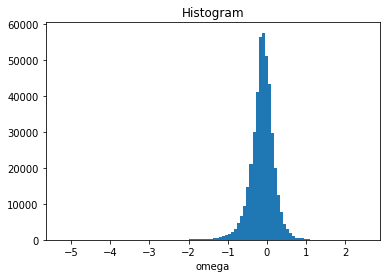

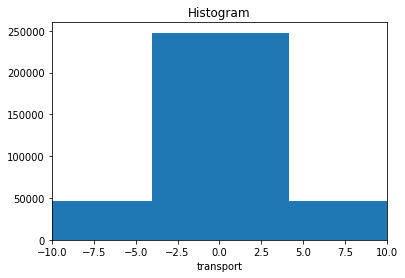

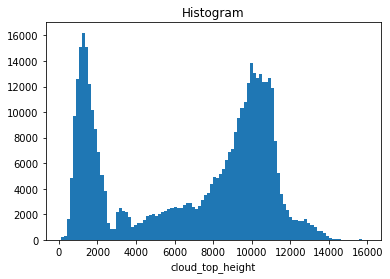

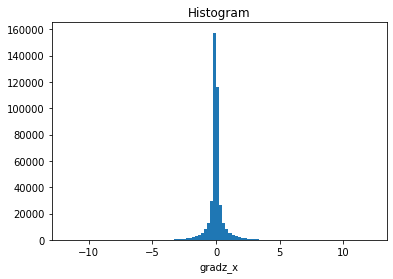

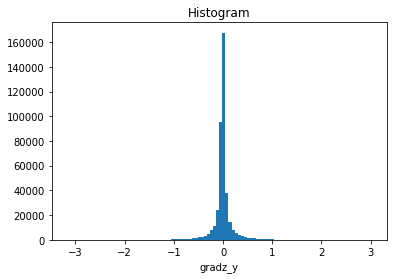

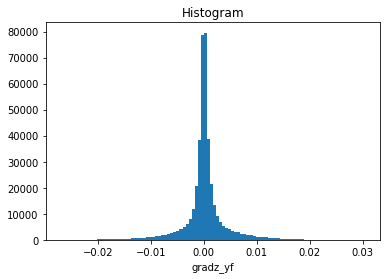

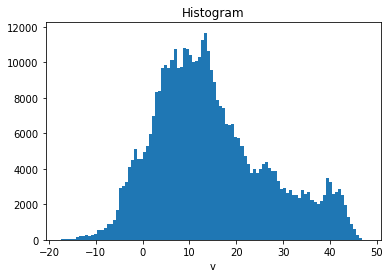

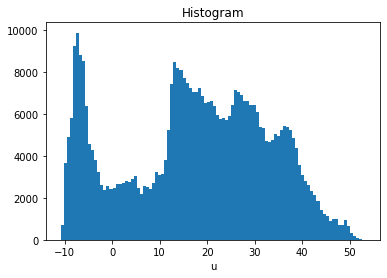

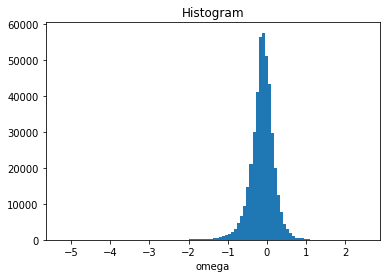

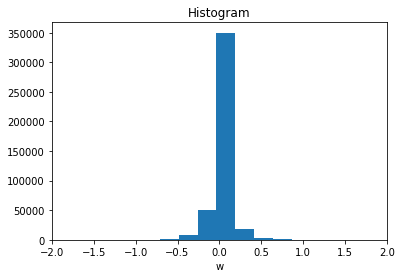

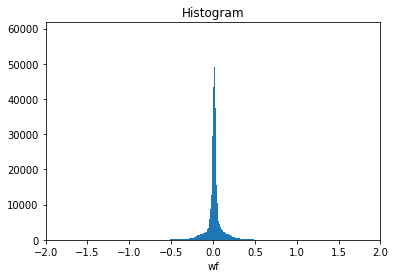

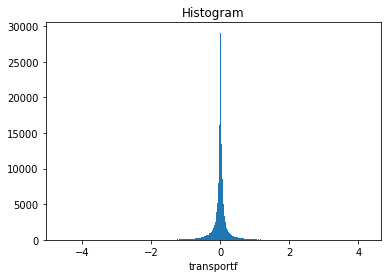

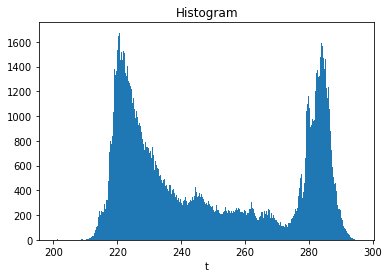

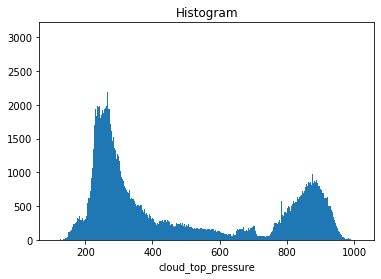

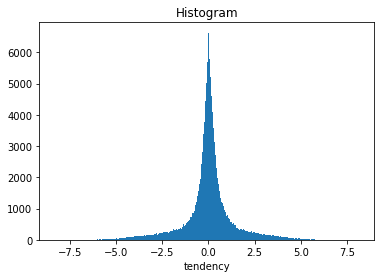

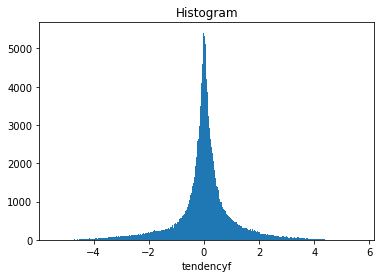

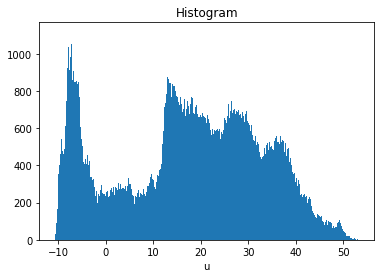

In [21]:
import matplotlib.pyplot as plt
ds_inter['omega'].plot.hist(bins=100)
plt.show()
plt.close()
ds_inter['transport'].plot.hist(bins=100)
plt.xlim(-10,10)
plt.show()
plt.close()
ds_inter['cloud_top_height'].plot.hist(bins=100)
plt.show()
plt.close()
ds_inter['gradz_x'].plot.hist(bins=100)
plt.show()
plt.close()
ds_inter['gradz_y'].plot.hist(bins=100)
plt.show()
plt.close()
ds_inter['gradz_yf'].plot.hist(bins=100)
plt.show()
plt.close()
ds_inter['v'].plot.hist(bins=100)
plt.show()
plt.close()
ds_inter['u'].plot.hist(bins=100)
plt.show()
plt.close()
ds_inter['omega'].plot.hist(bins=100)
plt.show()
plt.close()
ds_inter['w'].plot.hist(bins=1000)
plt.xlim(-2,2)
plt.show()
plt.close()
ds_inter['wf'].plot.hist(bins=1000)
plt.xlim(-2,2)
plt.show()
plt.close()
ds_inter['transportf'].plot.hist(bins=1000)
plt.show()
plt.close()
ds_inter['t'].plot.hist(bins=1000)
plt.show()
plt.close()
ds_inter['cloud_top_pressure'].plot.hist(bins=1000)
plt.show()
plt.close()
ds_inter['tendency'].plot.hist(bins=1000)
plt.show()
plt.close()
ds_inter['tendencyf'].plot.hist(bins=1000)
plt.show()
plt.close()

ds_inter['u'].plot.hist(bins=1000)
plt.show()
plt.close()

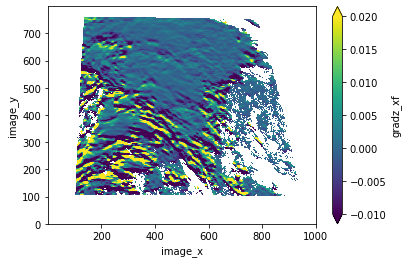

In [8]:
ds_inter['gradz_xf'].plot.imshow(vmin=-0.01, vmax=0.02)


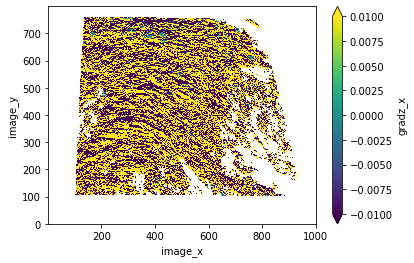

In [9]:
ds_inter['gradz_x'].plot.imshow(vmin=-0.01, vmax=0.01)


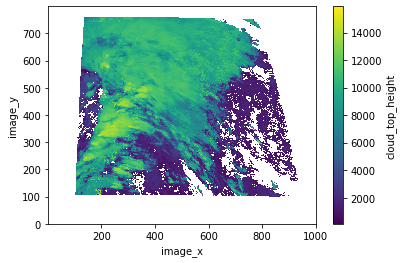

In [10]:
ds_inter['cloud_top_height'].plot.imshow()


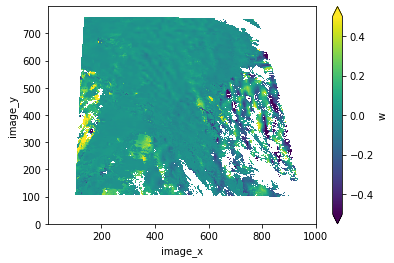

In [11]:
ds_inter['w'].plot.imshow(vmin=-0.5, vmax=0.5)


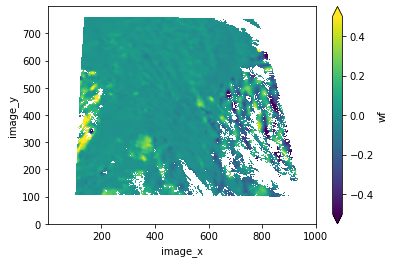

In [12]:
ds_inter['wf'].plot.imshow(vmin=-0.5, vmax=0.5)

In [13]:
ds_s['image_y']=abs(ds_s['image_y']-800)


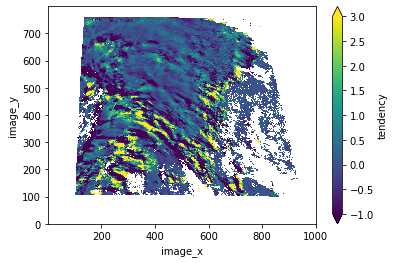

In [14]:
ds_inter['tendency'].plot.imshow(vmin=-1, vmax=3)

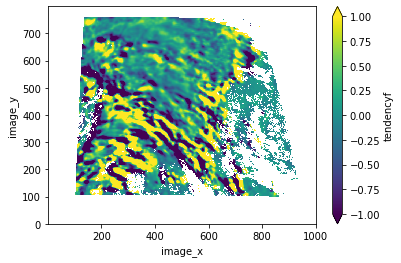

In [15]:
ds_inter['tendencyf'].plot.imshow(vmin=-1, vmax=1)

In [16]:
ds_inter['we']=ds_inter['tendency']+ds_inter['transport']-ds_inter['w']
ds_inter['wef']=ds_inter['tendency']+ds_inter['transportf']-ds_inter['wf']

(-10, 10)

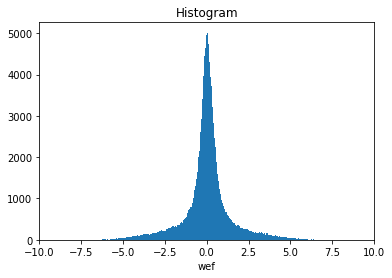

In [17]:
ds_inter['wef'].plot.hist(bins=1000)
plt.xlim(-10,10)

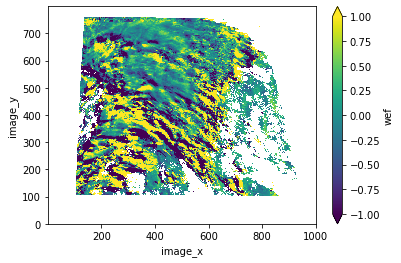

In [18]:
ds_inter['wef'].plot.imshow(vmin=-1, vmax=1)